In [5]:
#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

# from keras.datasets import imdb
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
# from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
#import keras
#from keras.layers import Input,Dense,Lambda
#from keras.models import Model
import os
import numpy as np
#from keras.preprocessing import image as image_p
#from keras.applications.imagenet_utils import preprocess_input
#from keras.applications.vgg16 import VGG16
#import time
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
#from keras.preprocessing import image
from  matplotlib import pyplot
#from keras.layers.normalization import BatchNormalization
import cv2
#import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
#from keras.layers import Reshape
#import keras.backend as K
import numpy

In [6]:
!pip install xmltodict

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import xmltodict, json
anno = os.listdir('rotated_annotations')
import imgaug as ia
from imgaug import augmenters as iaa
import math

In [8]:
def rotate_and_translate_points(cx,cy,angle,width,height,w,d):
    
    points = []
    
    #print(cx,cy,rectange_points,angle,width,height)
    
    if angle>(3.14159265358979323846/2):
        angle = angle - 3.14159265358979323846
    rectangle_points = [(w/2.0,d/2.0),(w/2.0,-d/2.0),(-w/2.0,-d/2.0),(-w/2.0,d/2.0)]
    for xr,yr in rectangle_points:
        xtemp = math.cos(angle)*xr + math.sin(angle)*yr
        yr = math.sin(angle)*xr - math.cos(angle)*yr
        xr = xtemp
    
        xr = xr + cx
        yr = yr + cy
        
        #print(xr,yr,width,height)
        if (xr/width)*224 >225 or (yr/height)*224 >225:
            print("has too be")
            print("greater",(xr/width)*224)
            print("greater",(yr/height)*224)
        #points.append(((xr/width)*224,(yr/height)*224))
        points.append((xr,yr))
    return points

In [9]:
def process_image_keypoints(img,rectangle_points):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    point_list = rectangle_points
    rects = []
    for a,b in point_list:
        a = a*ratio
        b = b*ratio
        rects.append([a+left,b+top])
    return new_im,rects

In [10]:
!readlink -f images/kusk fish/334. fish2701.jpg

/storage/thesis/fish-classification/images/kusk
/storage/thesis/fish-classification/fish2701.jpg


In [11]:
count_correct = 0
count_wrong = 0
labels =  []
images = []
bb = []
bboxes = []
image_sizes = []
image_names = []
bb_sizes = []
bboxes_rot =  []
for file in anno:
    #try:
    if(file.split(".")[-1]=='xml'):
        try:
            with open("rotated_annotations/"+file,'r') as f:
                text = f.read()
                d = xmltodict.parse(text)
                path = d['annotation']['path'].split("/home/parmeet/thesis/fish-classification/")[1]
                #print(path)
                bgr_img = cv2.imread(path)
                img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                bbox = obj['robndbox']
                
                cx,cy,w,h,angle = float(bbox['cx']),float(bbox['cy']),float(bbox['w']),float(bbox['h']),float(bbox['angle'])
                
                width,height = float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])
                rectange_points = rotate_and_translate_points(cx,cy,angle,width,height,w,h)
                
                img,rectange_points = process_image_keypoints(img,rectange_points)
                
                
                keypoints = []
                for x,y in rectange_points:
                        keypoints.append(ia.Keypoint(x=x, y=y))
                bboxes.append(ia.KeypointsOnImage(keypoints, shape=img.shape))                
                labels.append(obj['name'])
                images.append(img)
                image_names.append(file)
                bb_sizes.append((w,h))
                bboxes_rot.append([w,h,cx,cy,angle])
                image_sizes.append((float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])))
                count_correct += 1
        except Exception as ex:
           print(ex)
           count_wrong += 1

float division by zero
OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cvtColor

float division by zero
has too be
greater 408.8207375
greater 46.88719
has too be
greater 408.8207375
greater 223.28719
has too be
greater 296.8207375
greater 223.28719
has too be
greater 296.8207375
greater 46.88719
float division by zero
float division by zero
has too be
greater 234.96111275720165
greater 785.446
has too be
greater 234.96111275720165
greater 956.7793333333334
has too be
greater 75.25740905349794
greater 956.7793333333334
has too be
greater 75.25740905349794
greater 785.446
float division by zero
float division by zero
float division by zero
has too be
greater 574.8730148566485
greater 338.47705066917007
has too be
greater 503.0825475176041
greater 402.8266255372785
has too be
greater 256.7305691433515
greater 127.98838933082996
has too be
greater 328.5210364823959
greater 63.63881446272144
OpenCV(3.4.1) /io/opencv/modules/imgpr

In [12]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            #shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [13]:
i = 0
indexes = []
for idx,lb in enumerate(labels):
    if (lb=='crab' or lb=='lobster' or lb=='cod' or lb=='kusk' or lb=='halibut'):
        indexes.append(idx)

In [14]:
bboxes = list(np.array(bboxes)[indexes])
labels =  list(np.array(labels)[indexes])
images = list(np.array(images)[indexes])
image_sizes = list(np.array(image_sizes)[indexes])

In [15]:
import seaborn as sns
import numpy as np
from scipy.stats import itemfreq
itemfreq(labels)

/opt/conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


array([['cod', '724'],
       ['crab', '503'],
       ['halibut', '915'],
       ['kusk', '459'],
       ['lobster', '631']], dtype='<U21')

In [16]:
num_labels = len(np.unique(list(labels)))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(labels))
le_labels = le.transform(labels)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
numpy.save('classes.npy', le.classes_)

In [17]:
def augment_images(images,bboxes,labels,image_sizes,times):
    all_bboxes = []
    all_images = list(images)
    all_labels = list(labels.toarray())
    all_image_sizes = list(image_sizes)

    for bbs in bboxes:
            outputs = []
            for obj in bbs.keypoints:
                outputs.append(obj.x)
                outputs.append(obj.y)
            all_bboxes.append(np.array(outputs))
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_keypoints(bboxes)
        for bbs in bbs_aug:
            outputs = []
            for obj in bbs.keypoints:
                outputs.append(obj.x)
                outputs.append(obj.y)
            all_bboxes.append(np.array(outputs))
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels.toarray())
        all_image_sizes = all_image_sizes + list(image_sizes)
    return all_images,all_bboxes,all_labels,all_image_sizes

In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images):
    i = i + 1
    print(i)
    all_images,all_bboxes,all_labels,all_image_sizes = augment_images(np.array(images)[train],np.array(bboxes)[train],one_labels[train],np.array(image_sizes)[train],2)
    test_bboxes = []
    
    for bbs in list(np.array(bboxes)[test]):
            outputs = []
            
            for obj in bbs.keypoints:
                outputs.append(obj.x)
                outputs.append(obj.y)
            test_bboxes.append(np.array(outputs))
    kfold_data.append([all_images,all_bboxes,all_labels,all_image_sizes,np.array(images)[test],test_bboxes,one_labels[test],np.array(image_sizes)[test],np.array(bb_sizes)[test],np.array(bboxes_rot)[test]])

1
2
3
4
5


In [ ]:
with open('data-localize-rotated0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-localize-rotated1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-localize-rotated2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-localize-rotated3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-localize-rotated4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

'158. dsd_1271-santacruzisland-puertoayora-fishmarket-spinylobster-755x500_2.xml'

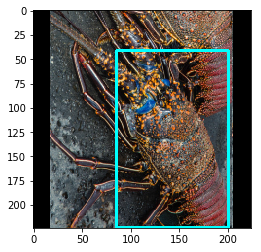

In [56]:

idx = 1008
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)

In [57]:
%matplotlib inline

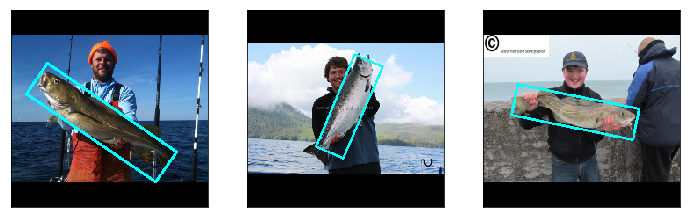

In [261]:
fig, ax = plt.subplots(figsize=(12,15))



plt.subplot(1, 3, 1)
idx = 381
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
idx = 786
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
idx = 1014
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.savefig('rotated_bounding_boxes.jpg')
plt.show()

In [174]:
i 

72

In [256]:
bbs.keypoints[0]

Keypoint(x=187.75761159, y=208.26463522)